## WeatherPy Analysis
* The strongest relationship out of all the graphs we have plotted is the relationship between the temperature and latitude. Simply put, temperature rises closer to the equator, and gets much colder towards the north and south poles.
* Other than that, however, there is no significant relationships in the other graphs, though there might be some interesting obersvations in the bottom left of the cloudiness chart as the left side of the latitude spectrum all have 0% cloudiness.
* The distribution in terms of latitude is uneven, as the left-hand side seems to be significantly colder than the right-hand side.

In [2]:
# Importing dependencies
import json
import requests
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random

# Importing library and API key
from citipy import citipy
from config import api_key

In [3]:
cities = []
long = []
lati = []

#Appending cities to a city list with random longitude and latitude
for x in range(500):
    lon = random.randint(-180, 180)
    lat = random.randint(-90, 90)
    long.append(lon)
    lati.append(lat)
    city = citipy.nearest_city(lon, lat)
    cities.append(city.city_name)

In [4]:
# Initializing sets
temp = []
cloud = []
humid = []
wind = []

# Sending requests and adding the data into the lists
for x,y in zip(long,lati):
    weather = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&lat={y}&lon={x}").json()
    try:
        temp.append(weather['main']['temp_max'])
        cloud.append(weather['main']['humidity'])
        humid.append(weather['clouds']['all'])
        wind.append(weather['wind']['speed'])
    except:
        temp.append(" ")
        cloud.append(" ")
        humid.append(" ")
        wind.append(" ")

In [5]:
# Initializing DataFrame
city_df = pd.DataFrame({
    "City Name": cities,
    "Longitude": long,
    "Latitude": lati,
    "Temperature": temp,
    "Cloudiness": cloud,
    "Humidity": humid,
    "Windiness": wind
})

# Dropping duplicate cities
city_df.drop_duplicates(subset= ["City Name"], keep = 'first', inplace = True)
city_df.head()

,City Name,Cloudiness,Humidity,Latitude,Longitude,Temperature,Windiness
0,ushuaia,100,0,-21,-145,296.45,9.48
1,belushya guba,91,44,48,120,290.20,6.93
2,bengkulu,94,32,86,-19,273.95,7.38
3,plouzane,100,92,-5,48,296.95,8.43
4,barentsburg,100,80,10,122,301.00,7.63


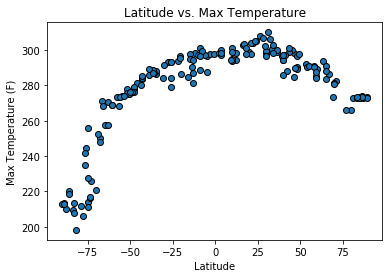

In [6]:
# Initializing Temp/Latitude graph
plt.scatter(city_df["Latitude"], city_df["Temperature"], edgecolor='black')
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

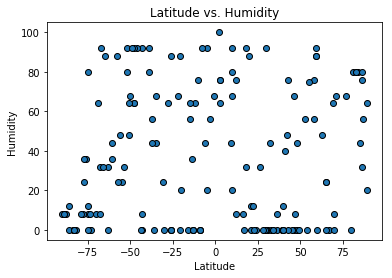

In [7]:
# Initializing Humidity/Latitude graph
plt.scatter(city_df["Latitude"], city_df["Humidity"], edgecolor='black')
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

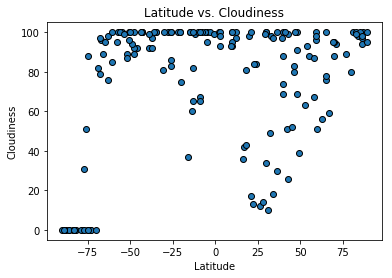

In [8]:
# Initializing Cloudiness/Latitude graph
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], edgecolor='black')
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

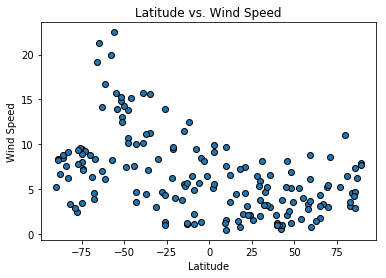

In [9]:
# Initializing Wind Speed/Latitude graph# Initi 
plt.scatter(city_df["Latitude"], city_df["Windiness"], edgecolor='black')
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()